<a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/model_monitoring/model_monitoring.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Cognifyz Internship Program**
## Restaurant Data Analysis - Level 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cognifyz_DA_Internship/Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## **Task 1: Restaurant Reviews**

### Analyze the text reviews to identify the most common positive and negative keywords

In [6]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [7]:
df['Rating text'].value_counts()

,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


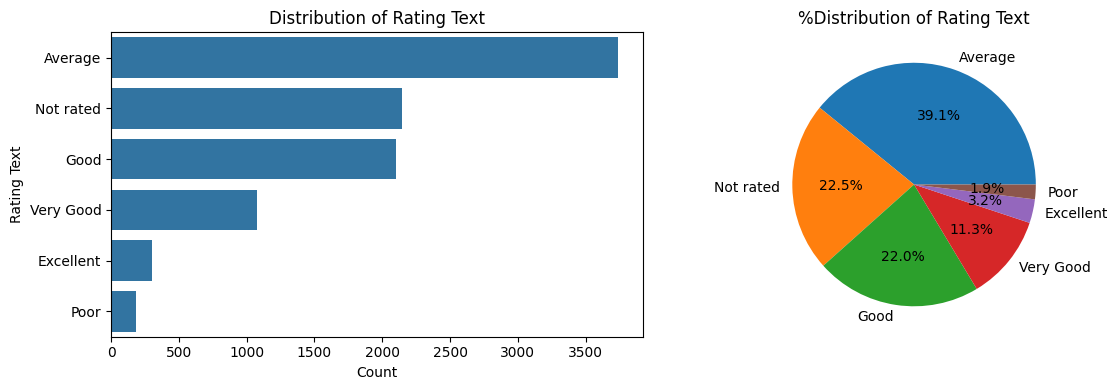

In [8]:
plt.figure(figsize=(12, 4))

# Horizontal bar plot
plt.subplot(1, 2, 1)
sns.countplot(y='Rating text', data=df, order=df['Rating text'].value_counts().index)
plt.title('Distribution of Rating Text')
plt.xlabel('Count')
plt.ylabel('Rating Text')

# Pie chart
plt.subplot(1, 2, 2)
df['Rating text'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('%Distribution of Rating Text')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [9]:
def identify_most_common_keywords(df, positive_keywords, negative_keywords):
    positive_counts = {}
    negative_counts = {}

    for rating_text in df['Rating text']:
        if isinstance(rating_text, str):
            for keyword in positive_keywords:
                if keyword in rating_text:
                    positive_counts[keyword] = positive_counts.get(keyword, 0) + 1
            for keyword in negative_keywords:
                if keyword in rating_text:
                    negative_counts[keyword] = negative_counts.get(keyword, 0) + 1

    most_common_positive = max(positive_counts, key=positive_counts.get, default=None) if positive_counts else None
    most_common_negative = max(negative_counts, key=negative_counts.get, default=None) if negative_counts else None

    return most_common_positive, most_common_negative

positive_keywords = ['Excellent', 'Very Good', 'Good']
negative_keywords = ['Average', 'Not rated', 'Poor']
most_common_positive, most_common_negative = identify_most_common_keywords(df, positive_keywords, negative_keywords)

print(f"Most common positive keyword: {most_common_positive}")
print(f"Most common negative keyword: {most_common_negative}")

Most common positive keyword: Good
Most common negative keyword: Average


### Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [10]:
df['Review_length'] = df['Rating text'].astype(str).apply(len)
average_review_length = df['Review_length'].mean()
print(f"Average review length: {round(average_review_length, 2)}")

Average review length: 7.02


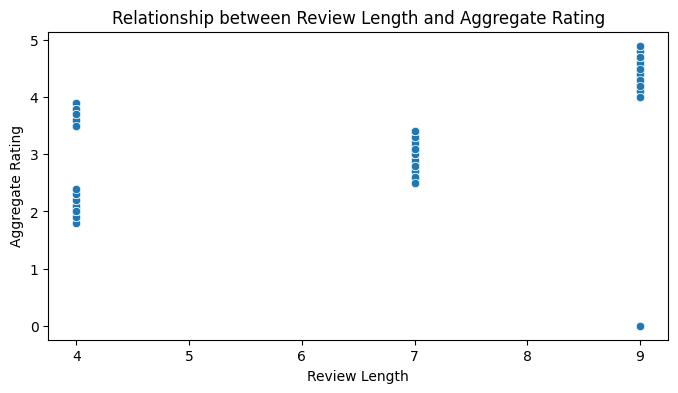

In [11]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Review_length', y='Aggregate rating', data=df)
plt.title('Relationship between Review Length and Aggregate Rating')
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.show()

In [12]:
correlation = df['Review_length'].corr(df['Aggregate rating'])
print(f"Correlation between review length and aggregate rating: {round(correlation, 2)}")

Correlation between review length and aggregate rating: -0.48


- The correlation suggests that, on average, shorter reviews tend to be associated with higher ratings, and longer reviews with lower ratings.

## **Task 2: Votes Analysis**

### Identify the restaurants with the highest and lowest number of votes

In [13]:
vote_max=df[df['Votes']==df['Votes'].max()]
print("Restaurants with highest votes are")
vote_max

Restaurants with highest votes are


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review_length
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,No,No,No,No,4,4.8,Dark Green,Excellent,10934,9


In [14]:
vote_min=df[df['Votes']==df['Votes'].min()]
print("Number of restaurants with lowest votes:",len(vote_min))
print("Restaurants with lowest votes are")
vote_min.head()

Number of restaurants with lowest votes: 1094
Restaurants with lowest votes are


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review_length
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0,9
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,No,1,0.0,White,Not rated,0,9
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0,9
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,9
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,No,No,No,No,1,0.0,White,Not rated,0,9


### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [15]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between number of votes and rating of a restaurant: {round(correlation, 2)}")

Correlation between number of votes and rating of a restaurant: 0.31


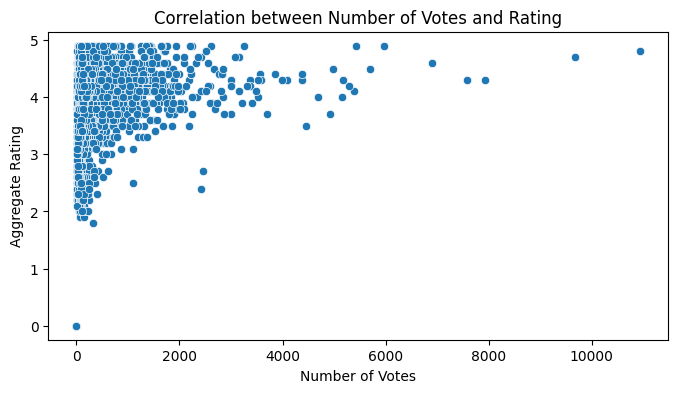

In [16]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Correlation between Number of Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()

- The correlation suggests a `weak positive` correlation. This means that as the number of votes increases, the restaurant rating tends to increase slightly, but the relationship is not very strong.

## **Task 3: Price Range vs. Online Delivery and Table Booking**

### Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [17]:
price_delivery = pd.crosstab(df['Price range'], df['Has Online delivery'])
price_table = pd.crosstab(df['Price range'], df['Has Table booking'])

print("Price Range vs. Online Delivery:")
print(price_delivery)

print("\nPrice Range vs. Table Booking:")
print(price_table)

Price Range vs. Online Delivery:
Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53

Price Range vs. Table Booking:
Has Table booking    No  Yes
Price range                 
1                  4443    1
2                  2874  239
3                   764  644
4                   312  274


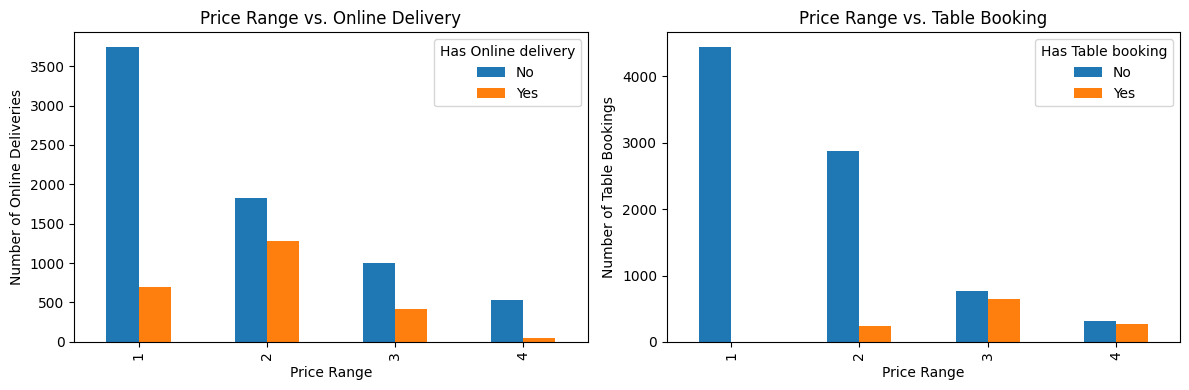

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

price_delivery.plot(kind='bar', ax=axes[0])
axes[0].set_title('Price Range vs. Online Delivery')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Number of Online Deliveries')

price_table.plot(kind='bar', ax=axes[1])
axes[1].set_title('Price Range vs. Table Booking')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Number of Table Bookings')

plt.tight_layout()
plt.show()

In [19]:
# Convert 'Has Online delivery' and 'Has Table booking' to numeric (0 and 1)
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Calculate the correlation
corr = df[['Price range','Has Online delivery','Has Table booking']].corr()
corr

,Price range,Has Online delivery,Has Table booking
Price range,1.000000,0.077918,0.501925
Has Online delivery,0.077918,1.000000,0.101224
Has Table booking,0.501925,0.101224,1.000000


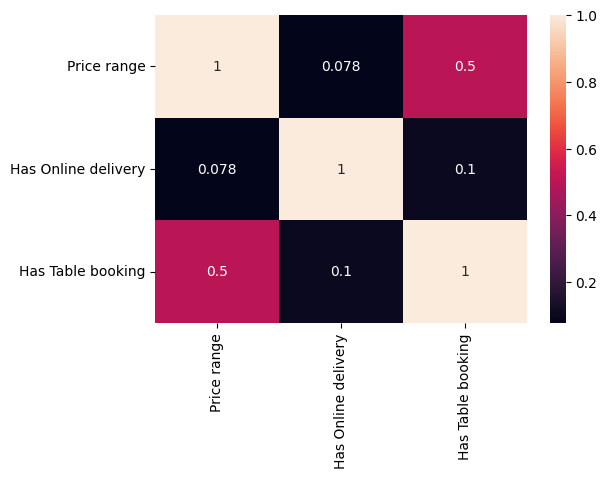

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True)
plt.show()

- **Higher price range** restaurants tend to offer **table booking** more frequently than lower price range restaurants.
- There's a noticeable *drop* in the number of restaurants offering **online delivery** as the price range *increases*.


### Determine if higher-priced restaurants are more likely to offer these services

In [21]:
df['Price range'].value_counts().sort_values()

,count
Price range,
4,586
3,1408
2,3113
1,4444


In [22]:
data=df[['Price range','Has Online delivery','Has Table booking']]

In [23]:
higher_priced = data[data['Price range'] >= 3]

In [24]:
price_table_booking = higher_priced.groupby('Price range')['Has Table booking'].mean()*100
price_online_delivery = higher_priced.groupby('Price range')['Has Online delivery'].mean()*100

print('Percentage of online delivery by higher-price ranges:')
print(round(price_table_booking.sort_index(ascending=False), 2))
print()
print('Percentage of table booking by higher-price ranges:')
print(round(price_online_delivery.sort_index(ascending=False), 2))

Percentage of online delivery by higher-price ranges:
Price range
4    46.76
3    45.74
Name: Has Table booking, dtype: float64

Percentage of table booking by higher-price ranges:
Price range
4     9.04
3    29.19
Name: Has Online delivery, dtype: float64


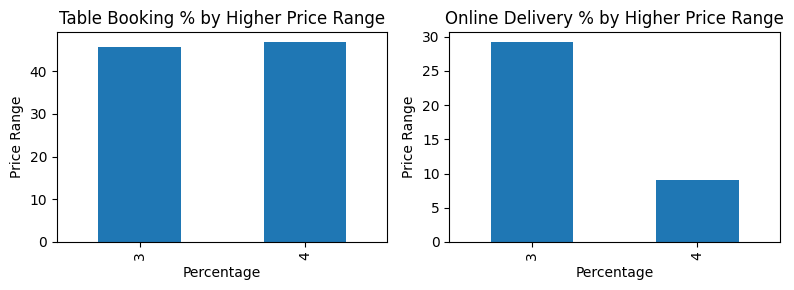

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

price_table_booking.plot(kind='bar', ax=axes[0])
axes[0].set_title('Table Booking % by Higher Price Range')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Price Range')


price_online_delivery.plot(kind='bar', ax=axes[1])
axes[1].set_title('Online Delivery % by Higher Price Range')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Price Range')

plt.tight_layout()
plt.show()

In [27]:
average_online_delivery_percentage = (higher_priced['Has Online delivery'].mean()) * 100
print(f"Average percentage of online delivery in higher-priced restaurants: {average_online_delivery_percentage:.2f}%")
average_table_booking_percentage = (higher_priced['Has Table booking'].mean()) * 100
print(f"Average percentage of table booking in higher-priced restaurants: {average_table_booking_percentage:.2f}%")

Average percentage of online delivery in higher-priced restaurants: 23.27%
Average percentage of table booking in higher-priced restaurants: 46.04%


- Higher-priced restaurants show a lower likelihood of offering online delivery compared to lower-priced restaurants.
- Conversely, higher-priced restaurants demonstrate a higher likelihood of offering table booking.